In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
import urllib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import geopandas as gpd
import pyogrio
from shapely.geometry import Point
from shapely import wkt

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
gdf = pyogrio.read_dataframe('tl_2023_36_tract/tl_2023_36_tract.shx')

### Population Data by census tract

In [3]:
Cenpop = gpd.read_file('nyc_decennialcensusdata_2010_2020_change-core-geographies.csv')

In [4]:
Cenpop['GeoID'] = Cenpop['GeoID'].astype(str)

In [5]:
Cenpop = pd.merge(Cenpop, gdf[['GEOID', 'geometry']], left_on='GeoID', right_on='GEOID', how='left')

In [6]:
Cenpop = gpd.GeoDataFrame(Cenpop, geometry='geometry_y').set_crs("EPSG:4269", inplace=True)

In [7]:
Cenpop.head()

Year GeoType Borough        GeoID  BCT2020 Name CDType NTAType   Pop1  \
0  2020  CT2020   Bronx  36005000100  2000100                      3,772   
1  2020  CT2020   Bronx  36005000200  2000200                      4,779   
2  2020  CT2020   Bronx  36005000400  2000400                      6,272   
3  2020  CT2020   Bronx  36005001600  2001600                      5,795   
4  2020  CT2020   Bronx  36005001901  2001901                      2,292   

   Pop1P  ... Pop70t74P Pop75t79 Pop75t79P Pop80t84 Pop80t84P Pop85pl  \
0  100.0  ...       0.2        4       0.1        6       0.2       1   
1  100.0  ...       2.8      108       2.3       61       1.3      96   
2  100.0  ...       4.0      105       1.7       69       1.1      64   
3  100.0  ...       4.2      171       3.0      131       2.3     143   
4  100.0  ...       0.7       16       0.7        9       0.4       6   

  Pop85plP geometry_x        GEOID  \
0      0.0       None  36005000100   
1      2.0       None  36005000200   
2      1.0       None  36005000400   
3      2.5       None  36005001600   
4      0.3       None  36005001901   

                                          geometry_y  
0  POLYGON ((-73.89772 40.79514, -73.89611 40.796...  
1  POLYGON ((-73.86648 40.80590, -73.86231 40.809...  
2  POLYGON ((-73.85960 40.81528, -73.85870 40.815...  
3  POLYGON ((-73.86246 40.81925, -73.86153 40.819...  
4  POLYGON ((-73.93180 40.80788, -73.93094 40.808...  

[5 rows x 53 columns]

### Legally opperating businesses in NYC

In [8]:
legal_opperate = pd.read_csv('https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?date=20231207&accessType=DOWNLOAD')

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_63224/1129729009.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  legal_opperate = pd.read_csv('https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?date=20231207&accessType=DOWNLOAD')


In [9]:
#drop na where longtitude and latitude are na.
legal_opperate = legal_opperate.dropna(subset=['Longitude', 'Latitude'])


In [10]:
geometry = [Point(xy) for xy in zip(legal_opperate.Longitude, legal_opperate.Latitude)]
legal_opperate = gpd.GeoDataFrame(legal_opperate, geometry=geometry)

legal_opperate.set_crs("EPSG:4269", inplace=True)
legal_opperate.head()

DCA License Number License Type License Expiration Date License Status  \
19        0365714-DCA     Business              03/31/2005       Inactive   
20        1076184-DCA     Business              12/31/2004       Inactive   
24        2061591-DCA     Business              12/31/2021       Inactive   
25        2009334-DCA     Business              05/23/2020       Inactive   
27        2038840-DCA     Business              07/31/2021       Inactive   

   License Creation Date                     Industry  \
19            04/08/1997                       Garage   
20            04/02/2001        Tobacco Retail Dealer   
24            11/25/2017                    Laundries   
25            06/09/2014                Sidewalk Cafe   
27            06/09/2016  Secondhand Dealer - General   

                           Business Name       Business Name 2  \
19  THE GARDENS 75TH STREET OWNERS CORP.                   NaN   
20                 JALIL, MOHAMMED ABDUL  SUNRISE DELICATESSEN   
24              SING WAH LAUNDROMAT INC.                   NaN   
25              DCB DELANCEY CORPORATION              SEL ROSE   
27           MD BROADWAY ELECTRONICS LLC                   NaN   

   Address Building Address Street Name  ... Council District      BIN  \
19             3538             75TH ST  ...             25.0  4029562   
20             2017          CHURCH AVE  ...             40.0  3116556   
24             6914             4TH AVE  ...             43.0  3145701   
25                1         DELANCEY ST  ...              1.0  1005662   
27             1888          JEROME AVE  ...             14.0  2013962   

           BBL   NTA Census Tract  \
19  4012740020  QN28        289.0   
20  3050810039  BK42      50801.0   
24  3058720047  BK31         68.0   
25  1004240012  MN27         18.0   
27  2031790031   NaN          NaN   

                                               Detail  Longitude   Latitude  \
19                Vehicle Spaces: 85, Bicycle Spaces: -73.891136  40.750745   
20                                                NaN -73.960737  40.650123   
24                       Laundry Type: Retail Laundry -74.023621  40.634397   
25  Sidewalk Cafe Type: Regular Unenclosed/Small U... -73.993820  40.720242   
27                                                NaN -73.906078  40.855206   

                                    Location                    geometry  
19   (40.75074488262595, -73.89113569640881)  POINT (-73.89114 40.75074)  
20    (40.6501225946322, -73.96073707845565)  POINT (-73.96074 40.65012)  
24   (40.63439650603149, -74.02362065616948)  POINT (-74.02362 40.63440)  
25  (40.720241568328824, -73.99382027141543)  POINT (-73.99382 40.72024)  
27   (40.85520587133494, -73.90607848934312)  POINT (-73.90608 40.85521)  

[5 rows x 28 columns]

### License application in NYC

In [11]:
license_appli = pd.read_csv('https://data.cityofnewyork.us/api/views/ptev-4hud/rows.csv?date=20231207&accessType=DOWNLOAD')

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_63224/2915713197.py:1: DtypeWarning: Columns (20,24) have mixed types. Specify dtype option on import or set low_memory=False.
  license_appli = pd.read_csv('https://data.cityofnewyork.us/api/views/ptev-4hud/rows.csv?date=20231207&accessType=DOWNLOAD')


In [12]:
license_appli = license_appli.dropna(subset=['Longitude', 'Latitude'])

In [13]:
geometry = [Point(xy) for xy in zip(license_appli.Longitude, license_appli.Latitude)]
license_appli = gpd.GeoDataFrame(license_appli, geometry=geometry)

license_appli.set_crs("EPSG:4269", inplace=True)
license_appli.head()

Application ID License Number License Type Application or Renewal  \
0   1066-2017-RHIC    1294131-DCA     Business                Renewal   
1   7066-2014-ASLS    2009515-DCA     Business            Application   
2   1164-2019-RDPD    1472251-DCA     Business                Renewal   
3  33701-2016-RELE    2025971-DCA     Business                Renewal   
4  34278-2018-RELE    2047043-DCA     Business                Renewal   

                 Business Name  Status  Start Date    End Date  \
0                 PEYKO TZENOV  Issued  01/09/2017  01/10/2017   
1         7TH AVE GOURMET INC.  Issued  06/02/2014  06/13/2014   
2  AMERICAN EAST PHARMACY INC.  Issued  01/09/2019  01/10/2019   
3        LUCAS ELECTRONICS INC  Issued  12/31/2016  01/10/2017   
4  ELITE WIRELESS GROUP NY LLC  Issued  12/31/2018  01/08/2019   

  Temp Op Letter Issued Temp Op Letter Expiration  ... Unit Description  \
0                   NaN                       NaN  ...  NaN         NaN   
1                   NaN                       NaN  ...  NaN         NaN   
2                   NaN                       NaN  ...  NaN         NaN   
3                   NaN                       NaN  ...  NaN         NaN   
4                   NaN                       NaN  ...  NaN         NaN   

       City State    Zip Contact Phone  Longitude   Latitude Active Vehicles  \
0     BRONX    NY  10467    9178047161 -73.877091  40.876214             NaN   
1  NEW YORK    NY  10011  718-783-3806 -73.975088  40.674997             NaN   
2  NEW YORK    NY  10002    2129251900 -73.996169  40.714118             NaN   
3  BROOKLYN    NY  11222  347-987-3235 -73.954098  40.729869             NaN   
4  BROOKLYN    NY  11226  718-484-7746 -73.949327  40.650826             NaN   

                     geometry  
0  POINT (-73.87709 40.87621)  
1  POINT (-73.97509 40.67500)  
2  POINT (-73.99617 40.71412)  
3  POINT (-73.95410 40.72987)  
4  POINT (-73.94933 40.65083)  

[5 rows x 26 columns]

### NYC subway station data:

In [14]:
Stations = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayNodes.csv' , index_col=None, header=0 )

In [15]:
geometry = [Point(xy) for xy in zip(Stations.long, Stations.lat)]
Stations = gpd.GeoDataFrame(Stations, geometry=geometry)

Stations.set_crs("EPSG:4269", inplace=True)
Stations.head()

name   id boro        lat       long  lines  \
0  Greenpoint Av  G26   Bk  40.731352 -73.954449      G   
1          21 St  G24    Q  40.744065 -73.949724      G   
2       Court Sq  G22    Q  40.746554 -73.943832      G   
3          36 St  G20    Q  40.752039 -73.928781    M R   
4   Queens Plaza  G21    Q  40.748973 -73.937243  E M R   

                     geometry  
0  POINT (-73.95445 40.73135)  
1  POINT (-73.94972 40.74406)  
2  POINT (-73.94383 40.74655)  
3  POINT (-73.92878 40.75204)  
4  POINT (-73.93724 40.74897)

### NYC Bus Station data

In [16]:
bus_data = pd.read_csv('https://data.cityofnewyork.us/api/views/t4f2-8md7/rows.csv?accessType=DOWNLOAD')

In [17]:
bus_data['geometry'] = bus_data['the_geom'].apply(wkt.loads)

In [18]:
bus_data = gpd.GeoDataFrame(bus_data, geometry='geometry')
bus_data.set_crs("EPSG:4269", inplace=True)
bus_data.head()

the_geom  BoroCode  BoroName  BoroCD  \
0  POINT (-73.94874357365637 40.64085475597672)         3  Brooklyn     317   
1   POINT (-74.02283555116742 40.6292447605423)         3  Brooklyn     310   
2  POINT (-73.92467258003798 40.67375874807616)         3  Brooklyn     308   
3  POINT (-73.9401345806071 40.578033768126936)         3  Brooklyn     315   
4  POINT (-73.93991658060635 40.57805676808165)         3  Brooklyn     315   

   CounDist  AssemDist  StSenDist  CongDist Shelter_ID Corner      On_Street  \
0        45         42         21         9    BR02218     SW           AV D   
1        43         46         26        11    BR02219     SW           5 AV   
2        41         55         20         9    BR02220     SE    ST MARKS AV   
3        48         45         23         8    BR02221     SW  ORIENTAL BLVD   
4        48         45         23         8    BR02222     SW  ORIENTAL BLVD   

       Cross_Stre  Longitude   Latitude  \
0     NOSTRAND AV -73.948745  40.640863   
1  BAY RIDGE PKWY -74.022837  40.629253   
2      BUFFALO AV -73.924674  40.673767   
3    MACKENZIE ST -73.940136  40.578042   
4    MACKENZIE ST -73.939918  40.578065   

                                          NTAName FEMAFldz  \
0                           East Flatbush-Erasmus        X   
1                                       Bay Ridge        X   
2                           Crown Heights (North)        X   
3  Sheepshead Bay-Manhattan Beach-Gerritsen Beach        X   
4  Sheepshead Bay-Manhattan Beach-Gerritsen Beach        X   

                       FEMAFldT  HrcEvac                    geometry  
0  AREA OF MINIMAL FLOOD HAZARD      5.0  POINT (-73.94874 40.64085)  
1  AREA OF MINIMAL FLOOD HAZARD      NaN  POINT (-74.02284 40.62924)  
2  AREA OF MINIMAL FLOOD HAZARD      NaN  POINT (-73.92467 40.67376)  
3  AREA OF MINIMAL FLOOD HAZARD      1.0  POINT (-73.94013 40.57803)  
4  AREA OF MINIMAL FLOOD HAZARD      1.0  POINT (-73.93992 40.57806)

### NYC parking lot 

In [19]:
parking_data = pd.read_csv('DOITT_PARKING_LOT_20240420.csv')

In [20]:
parking_data['geometry'] = parking_data['the_geom'].apply(wkt.loads)
parking_data = gpd.GeoDataFrame(parking_data, geometry='geometry')
parking_data.set_crs("EPSG:4269", inplace=True)
parking_data.head()

the_geom    SOURCE_ID  FEAT_CODE  \
0  MULTIPOLYGON (((-73.97910559725612 40.69049642...  21500000001       5000   
1  MULTIPOLYGON (((-73.97943374194773 40.69316130...  21500000002       5000   
2  MULTIPOLYGON (((-73.9832399249372 40.702812757...  21500000003       5000   
3  MULTIPOLYGON (((-73.98189157977659 40.70310347...  21500000004       5000   
4  MULTIPOLYGON (((-73.98594989444811 40.70232449...  21500000005       5000   

   SUB_CODE     STATUS   SHAPE_Leng     SHAPE_Area  \
0    500000  Unchanged   778.318836   32676.073685   
1    500000    Updated  3737.772791  108080.622252   
2    500000  Unchanged   442.772495    5407.860486   
3    500000  Unchanged   284.623893    4027.729151   
4    500000  Unchanged  1567.687419  122903.007235   

                                            geometry  
0  MULTIPOLYGON (((-73.97911 40.69050, -73.97910 ...  
1  MULTIPOLYGON (((-73.97943 40.69316, -73.97944 ...  
2  MULTIPOLYGON (((-73.98324 40.70281, -73.98325 ...  
3  MULTIPOLYGON (((-73.98189 40.70310, -73.98190 ...  
4  MULTIPOLYGON (((-73.98595 40.70232, -73.98595 ...

### Median income by census tract

In [21]:
median_income = pd.read_csv('censustract-medianhouseholdincome2022.csv')

In [22]:
median_income['Census Tract'] = median_income['Census Tract'].astype(str)

In [23]:
med_income = pd.merge(median_income, gdf[['GEOID', 'geometry']], left_on='Census Tract', right_on='GEOID', how='left')

In [24]:
gpd_med_income = gpd.GeoDataFrame(med_income, geometry='geometry')

#### Median Income w/ geometry

In [28]:
gpd_med_income.head()

short_name                        long_name Census Tract     2009-2013  \
0  hh_inc_med_adj  Median household income (2022$)  36005041900  43887.524204   
1  hh_inc_med_adj  Median household income (2022$)  36005042000  36089.108199   
2  hh_inc_med_adj  Median household income (2022$)  36005042100  61363.318016   
3  hh_inc_med_adj  Median household income (2022$)  36005042200  61962.267279   
4  hh_inc_med_adj  Median household income (2022$)  36005042300  40694.738215   

      2014-2018        GEOID  \
0  36984.666450  36005041900   
1  42552.994051  36005042000   
2  39472.449695  36005042100   
3  52862.277148  36005042200   
4  42457.789589  36005042300   

                                            geometry  
0  POLYGON ((-73.88527 40.87923, -73.88466 40.879...  
1  POLYGON ((-73.86229 40.89261, -73.86220 40.892...  
2  POLYGON ((-73.88705 40.88436, -73.88686 40.884...  
3  POLYGON ((-73.85852 40.89134, -73.85813 40.892...  
4  POLYGON ((-73.87977 40.87712, -73.87972 40.877...

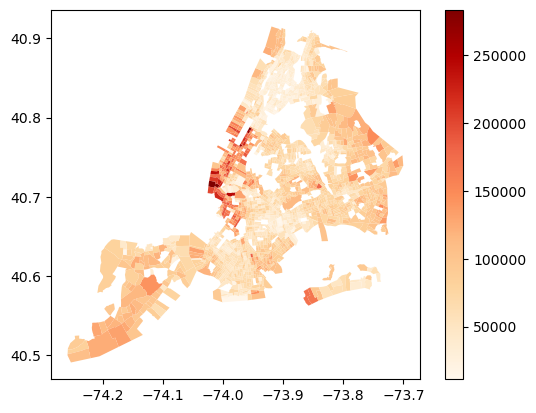

In [26]:
ax = gpd_med_income.plot(column='2014-2018', cmap='OrRd', legend=True)

# Show the plot
plt.show()